In [16]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
sns.set_theme(style="whitegrid")

In [6]:
LOGS = [f"../data/prices_round_1_day_{i}.csv" for i in [-2, -1, 0]]

In [7]:
price_dfs = [pd.read_csv(log, sep=';') for log in LOGS]

In [8]:
all_df = pd.concat(price_dfs, ignore_index=True)
all_df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [9]:
products = all_df['product'].unique()
product_dfs = {prod: all_df[all_df['product'] == prod] for prod in products}
product_dfs["AMETHYSTS"]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
5,-2,200,AMETHYSTS,9996,1,9995.0,30.0,NaN,NaN,10004,1,10005.0,30.0,NaN,NaN,10000.0,0.0
6,-2,300,AMETHYSTS,9996,1,9995.0,26.0,NaN,NaN,10004,1,10005.0,26.0,NaN,NaN,10000.0,0.0
8,-2,400,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,9998,3,10002.0,9.0,10005.0,20.0,9996.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59991,0,999500,AMETHYSTS,9995,28,NaN,NaN,NaN,NaN,10002,6,10005.0,28.0,NaN,NaN,9998.5,0.0
59993,0,999600,AMETHYSTS,9996,2,9995.0,27.0,NaN,NaN,10002,3,10004.0,2.0,10005.0,27.0,9999.0,0.0
59994,0,999700,AMETHYSTS,9996,2,9995.0,24.0,NaN,NaN,10004,2,10005.0,24.0,NaN,NaN,10000.0,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0


<Axes: >

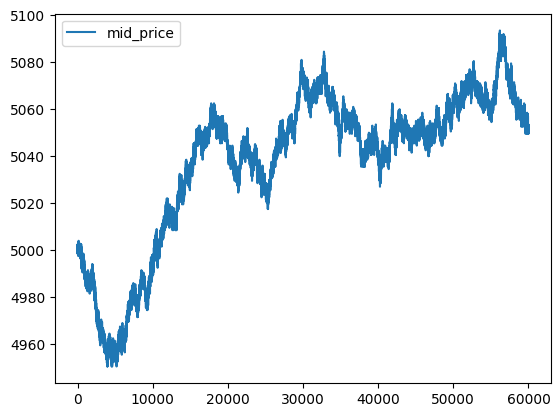

In [12]:
product_dfs["STARFRUIT"].plot(y="mid_price")

<Axes: >

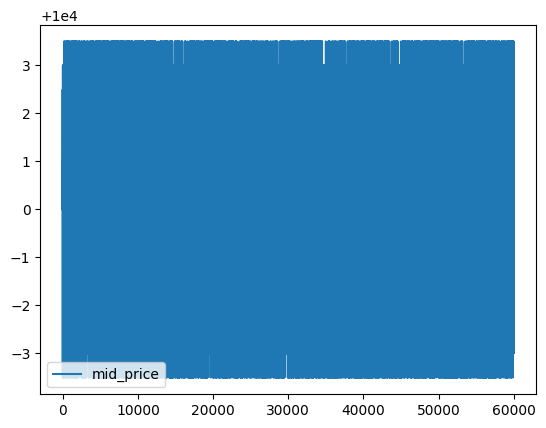

In [13]:
product_dfs["AMETHYSTS"].plot(y="mid_price")

## Hypotheses
- Starfruit mid_price is some kind of Brownian motion with some number of derivatives (+ noise)
- Amethysts mid_prices are independent

### Plot ACF/PACF

In [14]:
time_series_by_product = {prod: df["mid_price"] for prod, df in product_dfs.items()}

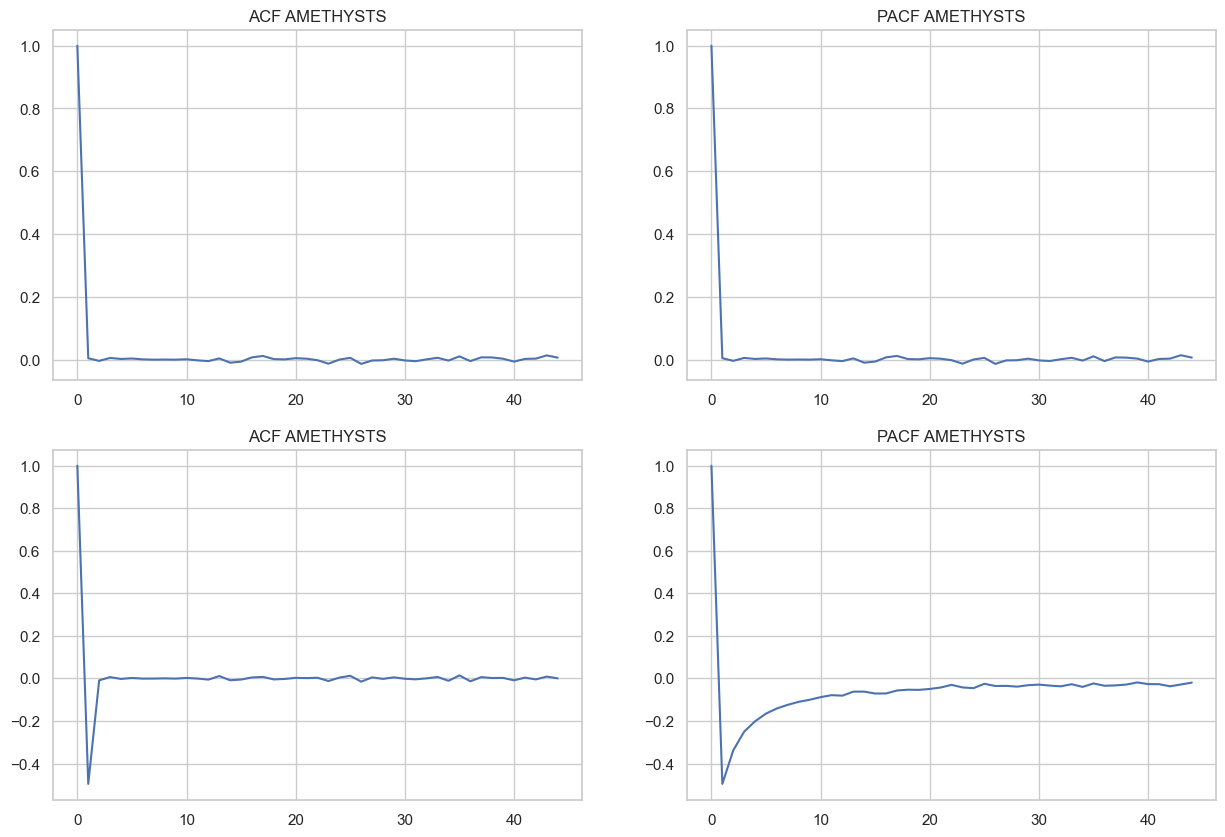

In [29]:
def plot_for_product(prod, num_i, *args, **kwargs):
    fig, axs = plt.subplots(num_i, 2, figsize=(15, 5 * num_i))
    series = time_series_by_product[prod]
    for i in range(num_i):
        acf_vals = acf(series, *args, **kwargs)
        pacf_vals = pacf(series, *args, **kwargs)
        axs[i, 0].plot(acf_vals)
        axs[i, 0].set_title(f"ACF {prod}")
        axs[i, 1].plot(pacf_vals)
        axs[i, 1].set_title(f"PACF {prod}")
        series = series.diff().dropna()

plot_for_product("AMETHYSTS", 2)

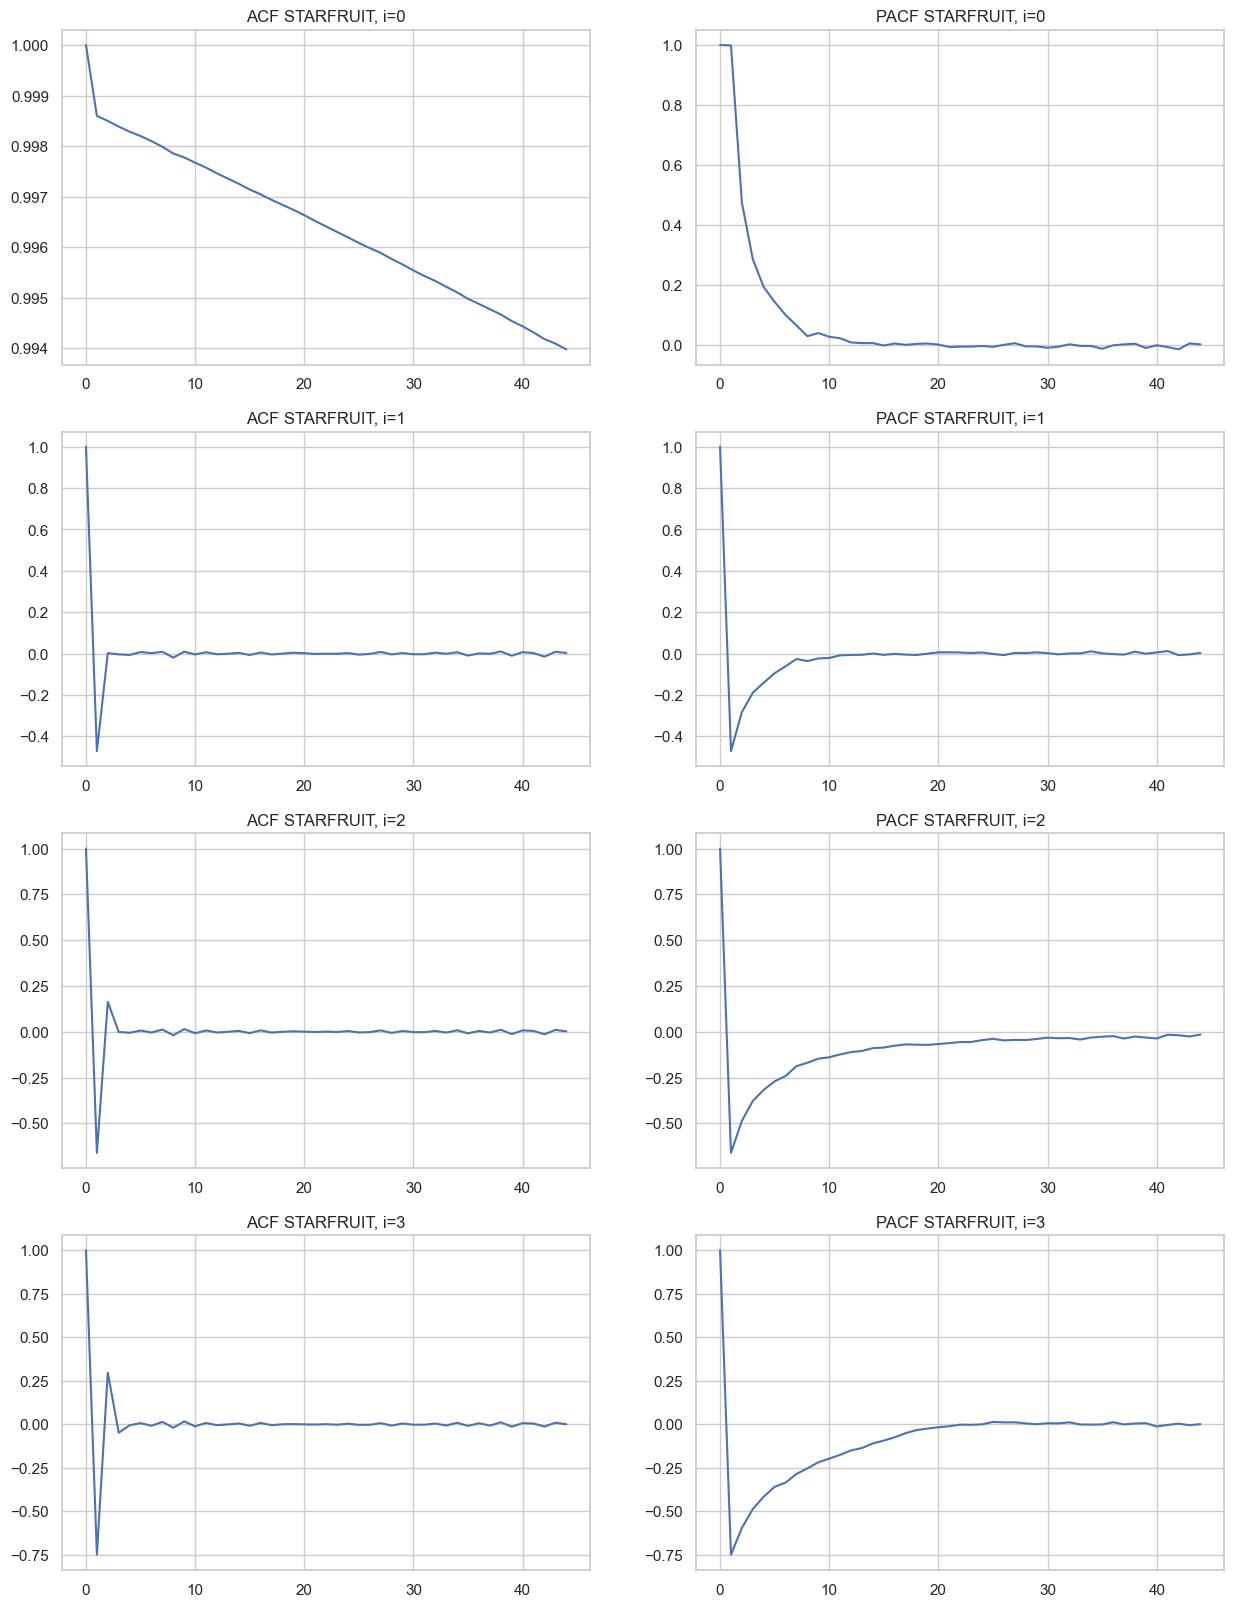

In [24]:
plot_for_product("STARFRUIT", 4)

## Observations

- Amethyst price seems to be totally independent
- Starfruit price seems to follow ARIMA(0, 1, 1) (by https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method#Autocorrelation_and_partial_autocorrelation_plots)

ARIMA(0, 1, 1) is

\begin{align*}
    \delta_t = \varepsilon_t + \theta_1\varepsilon_{t-1}
\end{align*}

where $\delta_t = X_t - X_{t-1}$ are the successive differences, and $\varepsilon_t$ are i.i.d. with zero mean (and also normal, but this probably isn't true in our case).

https://people.duke.edu/~rnau/411arim.htm -> "simple exponential smoothing"